## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./assignmentdata.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [351]:
df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']].mean()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

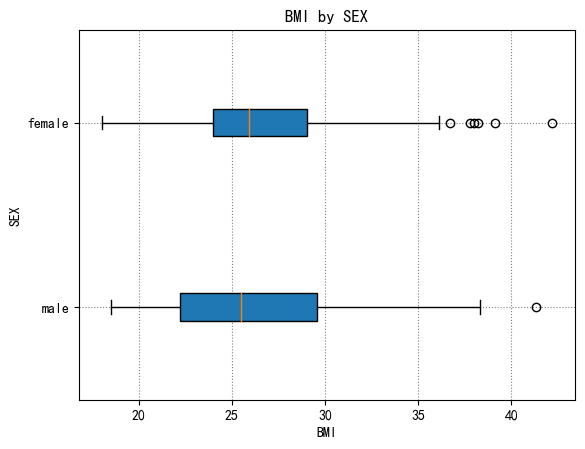

<Figure size 1000x200 with 0 Axes>

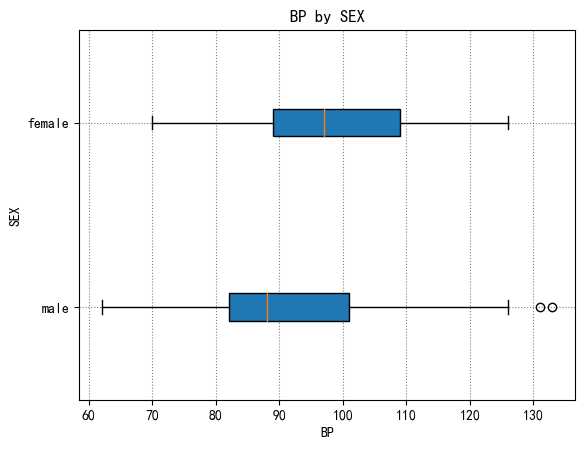

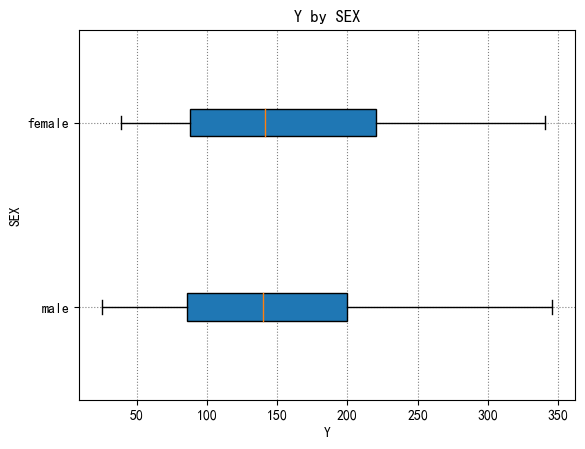

In [352]:
# BMI
plt.grid(color='gray', linestyle='dotted')
male_bmi = df[df['SEX']==1]['BMI']
female_bmi = df[df['SEX']==2]['BMI']
plt.boxplot([male_bmi,female_bmi],vert=False,patch_artist=True,labels=['male','female'])
plt.title('BMI by SEX')
plt.xlabel('BMI')
plt.ylabel('SEX')
plt.figure(figsize=(10,2)).patch.set_facecolor('white')
plt.tight_layout()
plt.show()
# BP
plt.grid(color='gray', linestyle='dotted')
male_bp = df[df['SEX']==1]['BP']
female_bp = df[df['SEX']==2]['BP']
plt.boxplot([male_bp,female_bp],vert=False,patch_artist=True,labels=['male','female'])
plt.title('BP by SEX')
plt.xlabel('BP')
plt.ylabel('SEX')
plt.show()
# Y
male_y = df[df['SEX']==1]['Y']
female_y = df[df['SEX']==2]['Y']
plt.grid(color='gray', linestyle='dotted')
plt.boxplot([male_y,female_y],vert=False,patch_artist=True,labels=['male','female'])
plt.title('Y by SEX')
plt.xlabel('Y')
plt.ylabel('SEX')
plt.show()



### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

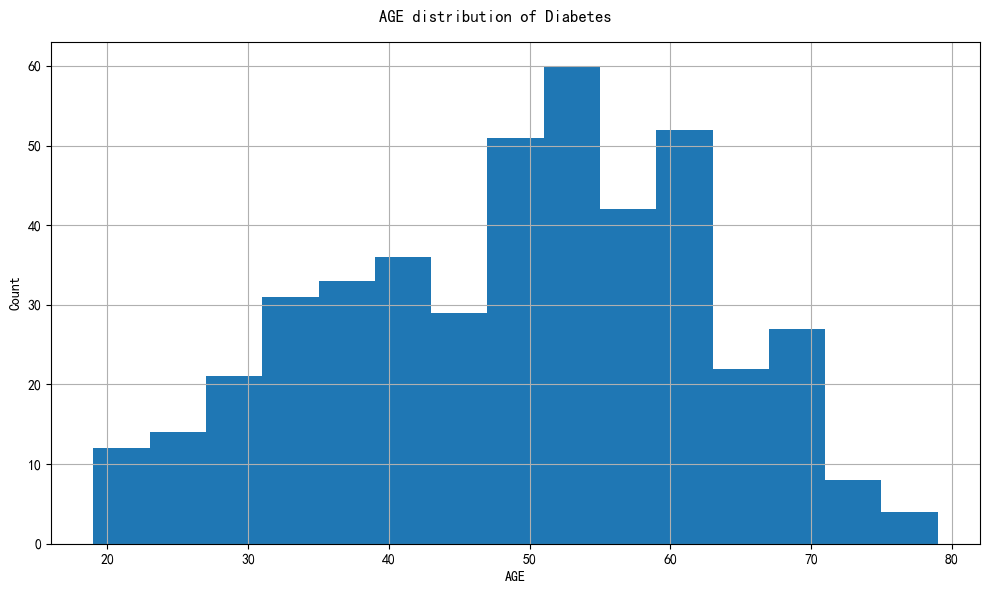

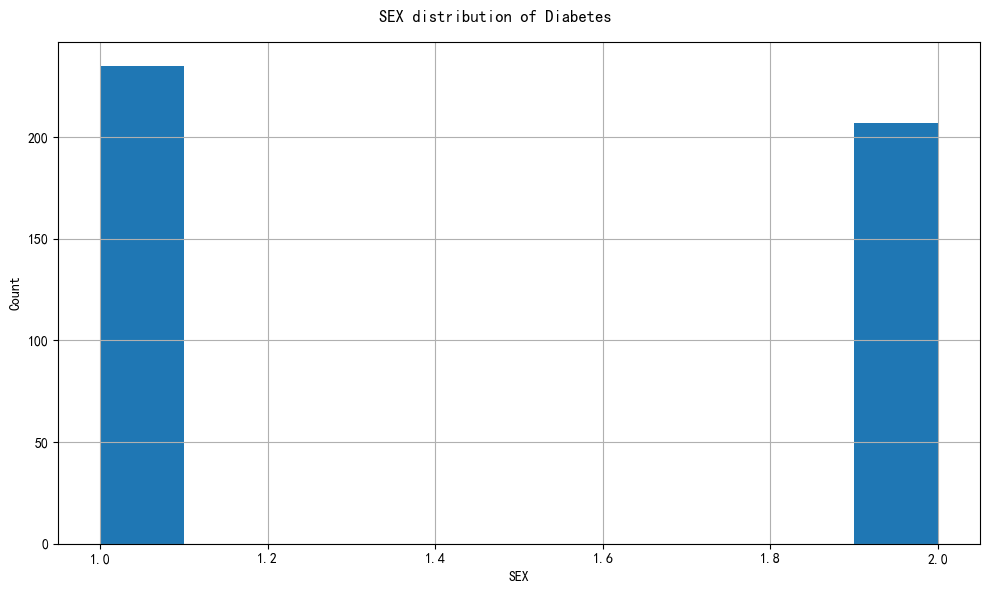

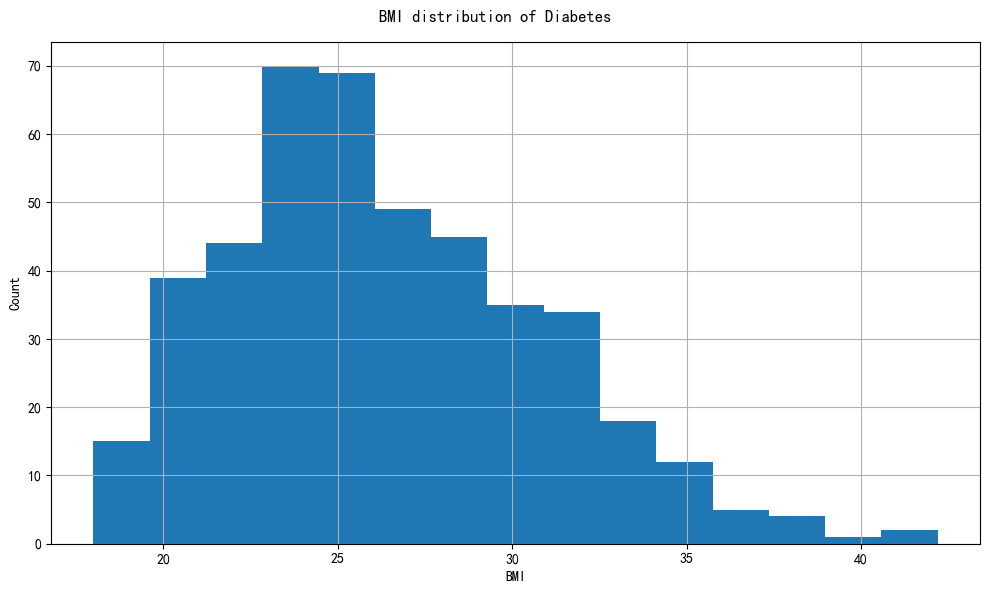

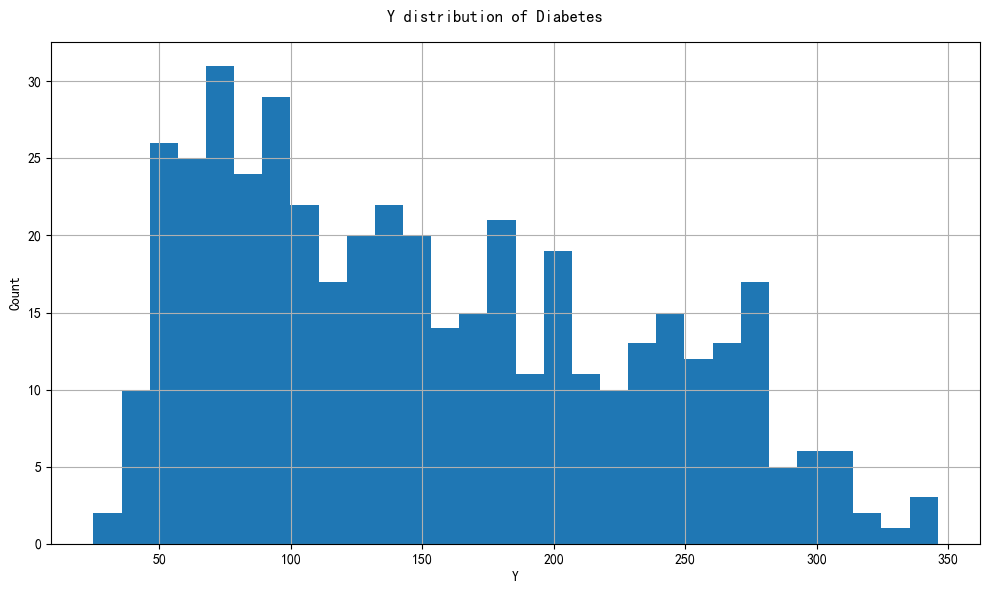

In [353]:
# AGE distribution
plt.figure().patch.set_facecolor('white')
df['AGE'].hist(bins=15, figsize=(10,6))
#bins=15 表示将数据分成 15 个等宽的区间，每个区间对应一个柱子，柱子的高度表示该区间内的数据个数或频率。
#figsize=(10,6) 表示设置绘图窗口的大小为 10 英寸宽，6 英寸高。
plt.suptitle('AGE distribution of Diabetes')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# SEX distribution
plt.figure().patch.set_facecolor('white')
df['SEX'].hist( figsize=(10,6))
plt.suptitle('SEX distribution of Diabetes')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# BMI distribution
plt.figure().patch.set_facecolor('white')
df['BMI'].hist(bins=15, figsize=(10,6))
plt.suptitle('BMI distribution of Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Y distribution
plt.figure().patch.set_facecolor('white')
df['Y'].hist(bins=30, figsize=(10,6))
plt.suptitle('Y distribution of Diabetes')
plt.xlabel('Y')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

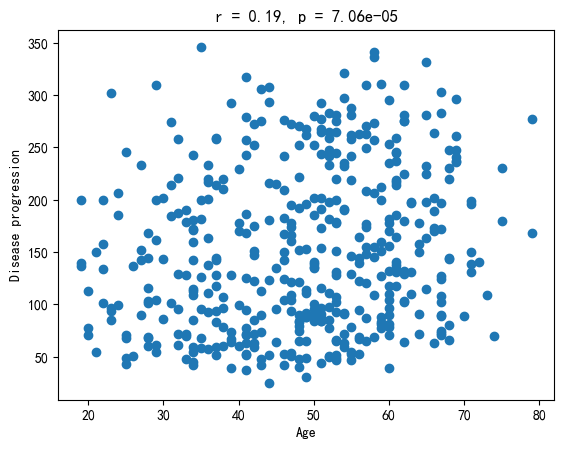

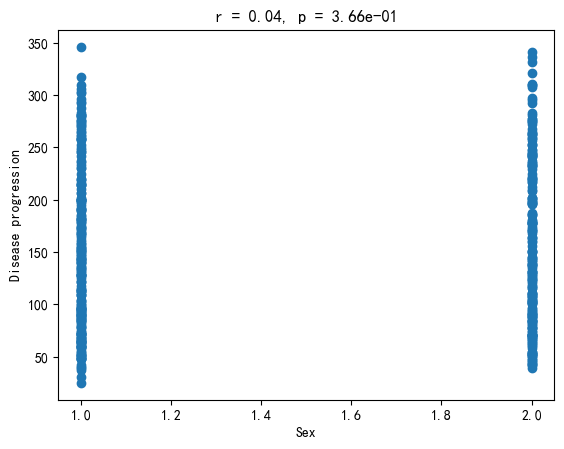

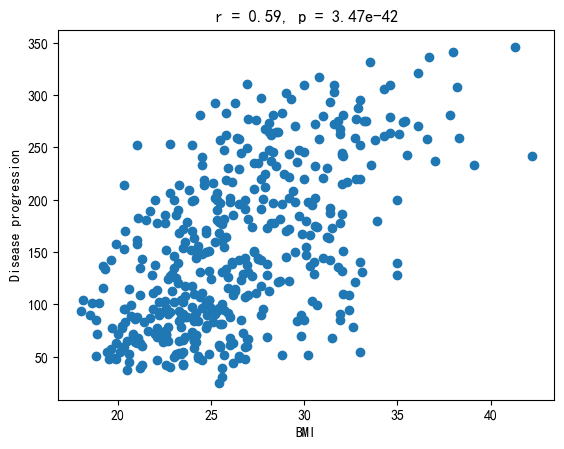

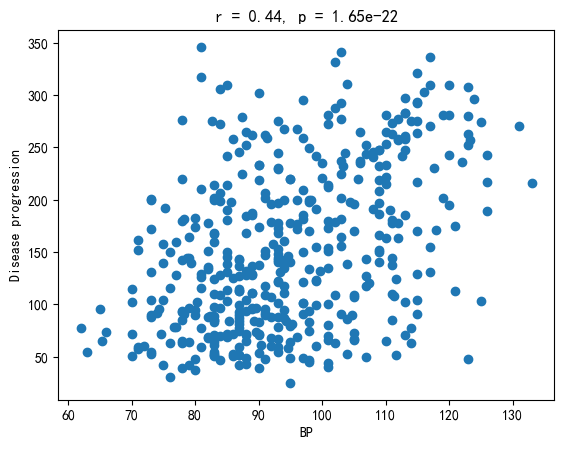

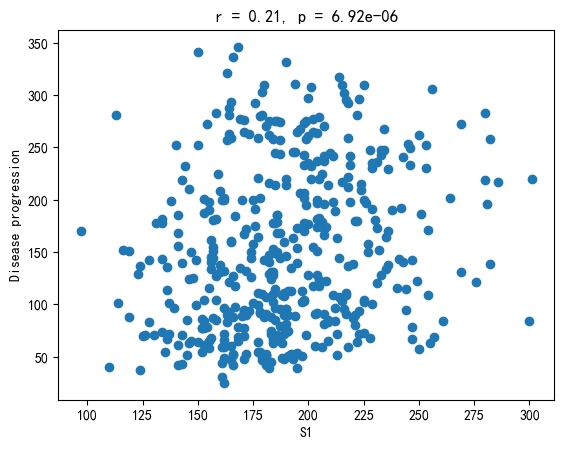

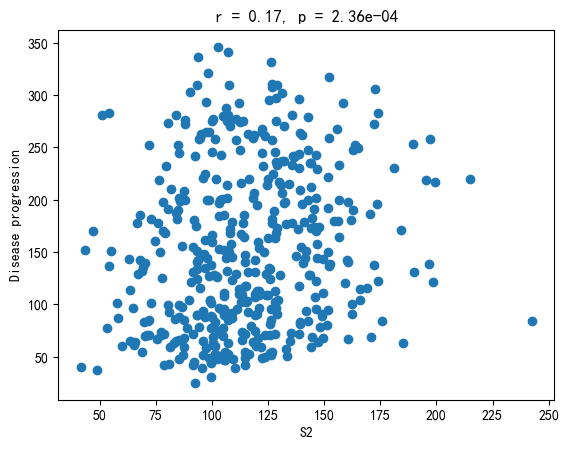

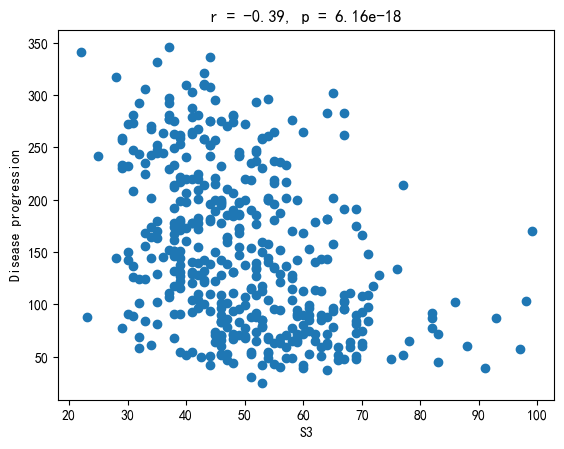

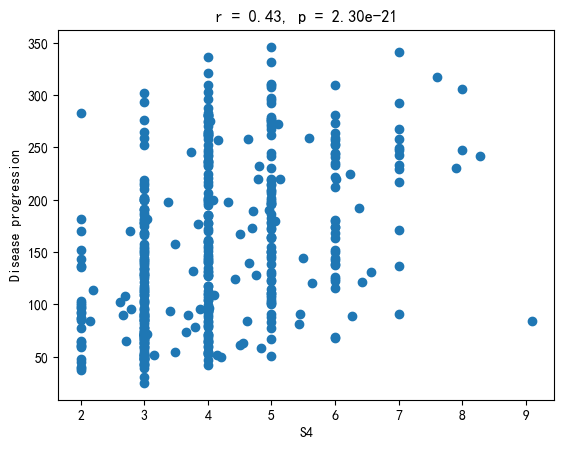

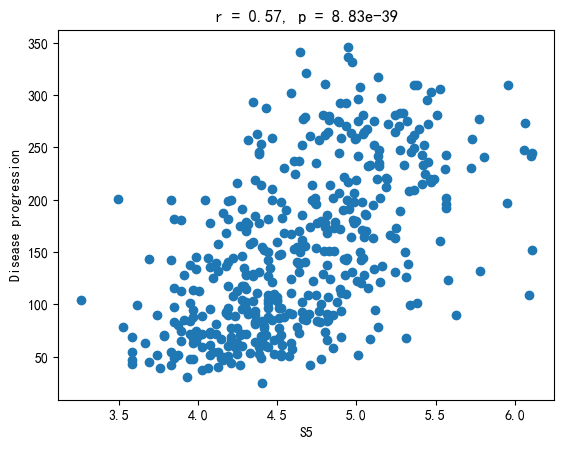

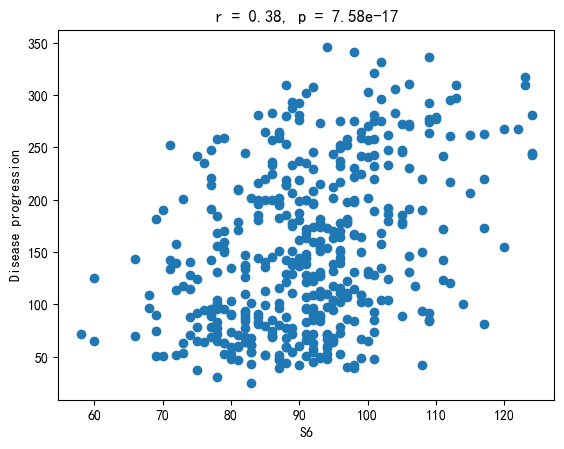

In [354]:
import scipy.stats as ss

# 读取数据集
#data = np.loadtxt("diabetes.txt", skiprows=1) # 跳过第一行表头
X = df.iloc[:, :10] # 取前10列作为自变量
Y = df.iloc[:, 10] # 取最后一列作为因变量

# 定义一个函数来计算并绘制两个变量之间的相关性
def plot_corr(x, y, label):
    r, p = ss.pearsonr(x, y) # 计算皮尔逊相关系数和p值
    plt.scatter(x, y) # 绘制散点图
    plt.xlabel(label) # 设置x轴标签
    plt.ylabel("Disease progression") # 设置y轴标签
    plt.title(f"r = {r:.2f}, p = {p:.2e}") # 设置标题，显示r和p值
    plt.show() # 显示图形

# 对每一列自变量与因变量进行相关性分析
labels = ["Age", "Sex", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"] # 定义每一列的标签
for i in range(10):
    plot_corr(X.iloc[:, i], Y, labels[i]) # 调用函数，传入第i列自变量和因变量以及标签

经上面十次相关性分析可得，S4和Y的相关性最为显著。由年龄和Y相关分析可得，

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

t 统计值: -0.9041147550244715
p 值: 0.3664292946519826
无法拒绝零假设：男性和女性之间的糖尿病进展程度没有显著差异。
下图中，蓝紫色代表男性，橙红色代表女性，紫色是男性和女性的重叠部分。


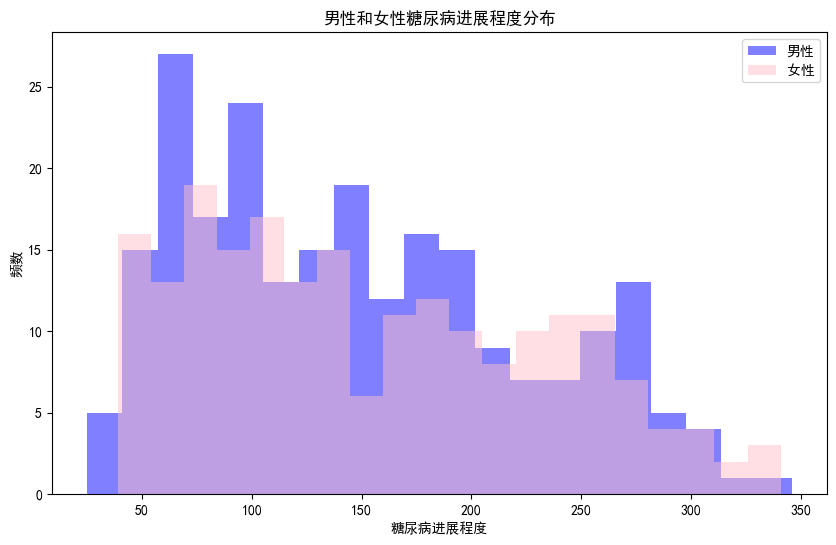

In [355]:
import scipy.stats as stats
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
# 分离男性和女性的数据
Y_male = df['Y'][df['SEX'] == 1]
Y_female = df['Y'][df['SEX'] == 2]
# 执行 t 检验
t_statistic, p_value = stats.ttest_ind(Y_male, Y_female)
# 显示 t 统计值和 p 值
print("t 统计值:", t_statistic)
print("p 值:", p_value)
# 设置显著性水平
alpha = 0.05
# 判断统计显著性
if p_value < alpha:
    print("拒绝零假设：男性和女性之间的糖尿病进展程度存在显著差异。")
else:
    print("无法拒绝零假设：男性和女性之间的糖尿病进展程度没有显著差异。")
print("下图中，蓝紫色代表男性，橙红色代表女性，紫色是男性和女性的重叠部分。")
# 可视化结果
plt.figure(figsize=(10, 6))
plt.hist(Y_male, bins=20, alpha=0.5, color='blue', label='男性')
plt.hist(Y_female, bins=20, alpha=0.5, color='pink', label='女性')
plt.xlabel('糖尿病进展程度')
plt.ylabel('频数')
plt.title('男性和女性糖尿病进展程度分布')
plt.legend()
plt.show()